# Logistic Regression Project 

In this project I worked with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. I have tried to create a logistic regression model that would predict whether or not they will click on an ad based off the features of that user.

The data set had the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [7]:
import sklearn
import numpy as np
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
import pandas as pd

In [5]:
data = pd.read_csv('advertising.csv')

In [6]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


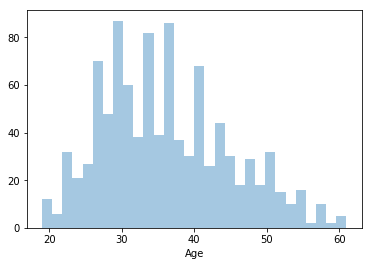

In [10]:
sns.distplot(data['Age'],kde=False,bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


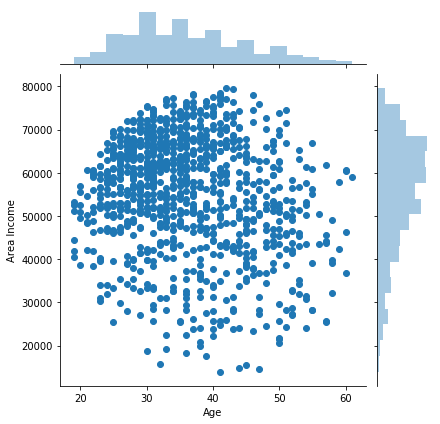

In [13]:
sns.jointplot(data['Age'],data['Area Income'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


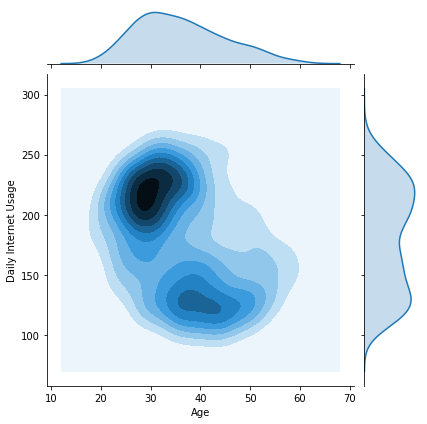

In [14]:
sns.jointplot(data['Age'],data['Daily Internet Usage'],kind='kde')

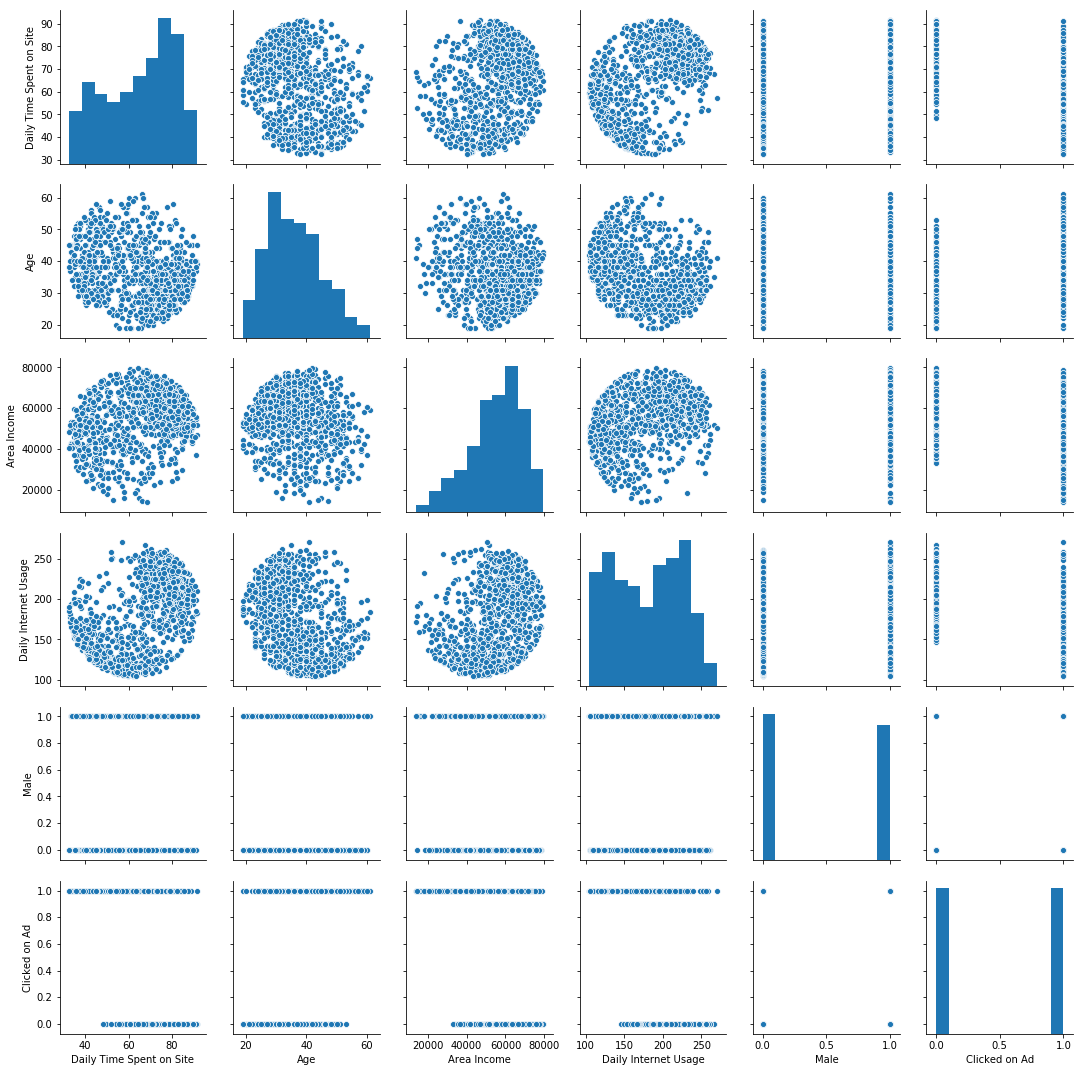

In [15]:
sns.pairplot(data)

In [16]:
data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


Performed various visualizations to find if there is any multi collinearity present in the independent variables

In [25]:
data_x = data

In [27]:
data_y = data_x.pop('Clicked on Ad')

Splitting the dataset into training and testing data

In [28]:
from sklearn.model_selection import train_test_split

In [108]:
train_x,test_x,train_y,test_y = train_test_split(data_x, 
                                                    data_y, test_size=0.30, 
                                                    random_state=101)

Using Logistic Regression from Scikit Learn and fitting it on training data and then using it to predict targets on test data

In [30]:
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel = LogisticRegression()
logmodel.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
predict_y = logmodel.predict(test_x)

In [102]:
logmodel.coef_

array([[-4.45816498e-02,  2.18379839e-01, -7.63621393e-06,
        -2.45264007e-02,  1.13334440e-03]])

In the following lines, I have created a confusion matrix to check the classification rate

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm =confusion_matrix(test_y,predict_y)
cm

array([[149,   8],
       [ 15, 128]], dtype=int64)

In the following lines, I have played with pandas to add predicted target and actual target into dataframe and created a new variable which reports whether classification was correct or not.

In [40]:
b = test_x
b["Predicted Target"] = predict_y.reshape((-1,1))
b["Actual Target"] = test_y
b

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Predicted Target,Actual Target
545,42.60,55,55121.65,168.29,0,1,1
298,80.39,31,66269.49,214.74,0,0,0
109,74.02,32,72272.90,210.54,0,0,0
837,55.77,49,55942.04,117.33,1,1,1
194,77.20,33,49325.48,254.05,1,0,0
605,64.67,51,24316.61,138.35,1,1,1
246,39.96,45,59610.81,146.13,1,1,1
693,65.15,29,41335.84,117.30,0,1,1
802,50.63,50,25767.16,142.23,0,1,1
406,56.34,50,68713.70,139.02,1,1,1


In [79]:
test_y = test_y.tolist()

In [81]:
correct =[]
for i in range(0, len(test_y)):
    Yo = test_y[i];Ys= predict_y[i]
    if(Yo==Ys):
        correct.append('Yes')
    else:
        correct.append('No')
b['Correct Prediction?'] = correct

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
b.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Predicted Target,Actual Target,Correct Prediction?
545,42.60,55,55121.65,168.29,0,1,1,Yes
298,80.39,31,66269.49,214.74,0,0,0,Yes
109,74.02,32,72272.90,210.54,0,0,0,Yes
837,55.77,49,55942.04,117.33,1,1,1,Yes
194,77.20,33,49325.48,254.05,1,0,0,Yes


In [55]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy = accuracy_score(test_y,predict_y)

In [95]:
accuracy

0.9233333333333333

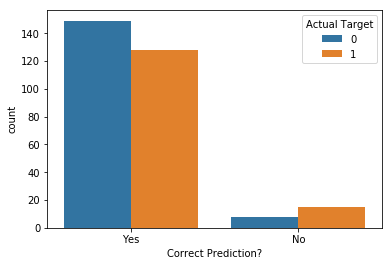

In [115]:
sns.countplot(b['Correct Prediction?'],hue= b['Actual Target'])

**We have got an accuracy of 0.92 from the model created and the above visulaization shows how many correct predictions were made values 0 and 1 individually.**

In [62]:
from sklearn.neural_network import MLPClassifier as mlp

In [64]:
clf = mlp()

In [65]:
clf.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [88]:
predict_y_2 = clf.predict(test_x)

In [92]:
accuracy_mlp = accuracy_score(test_y,predict_y_2)

In [93]:
print(accuracy)

0.5233333333333333


I have further compared this with MLP classifier model from neural networks which produced very less accuracy.